In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
train=pd.read_csv('/content/sample_data/trainti.csv')
df=train.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [146]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

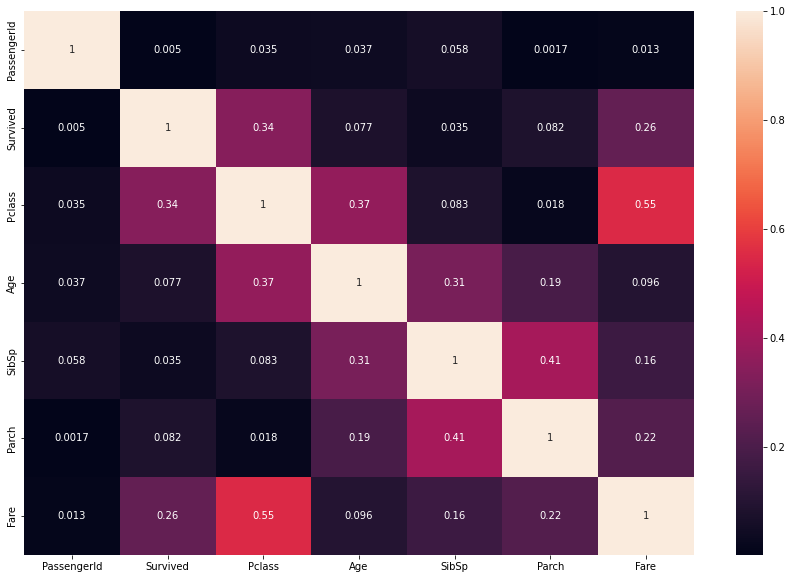

In [147]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(np.abs(df.corr()),annot=True)

In [148]:
df[df==0].count()

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

In [149]:
df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1, inplace=True)


In [150]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [151]:
df.fillna(df['Age'].median(), inplace = True)

In [152]:
Fare_col = df['Fare']
Fare_col.replace(to_replace = 0, value = Fare_col.mean(), inplace=True)

In [153]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [154]:
df['Fare'].unique()

array([  7.25      ,  71.2833    ,   7.925     ,  53.1       ,
         8.05      ,   8.4583    ,  51.8625    ,  21.075     ,
        11.1333    ,  30.0708    ,  16.7       ,  26.55      ,
        31.275     ,   7.8542    ,  16.        ,  29.125     ,
        13.        ,  18.        ,   7.225     ,  26.        ,
         8.0292    ,  35.5       ,  31.3875    , 263.        ,
         7.8792    ,   7.8958    ,  27.7208    , 146.5208    ,
         7.75      ,  10.5       ,  82.1708    ,  52.        ,
         7.2292    ,  11.2417    ,   9.475     ,  21.        ,
        41.5792    ,  15.5       ,  21.6792    ,  17.8       ,
        39.6875    ,   7.8       ,  76.7292    ,  61.9792    ,
        27.75      ,  46.9       ,  80.        ,  83.475     ,
        27.9       ,  15.2458    ,   8.1583    ,   8.6625    ,
        73.5       ,  14.4542    ,  56.4958    ,   7.65      ,
        29.        ,  12.475     ,   9.        ,   9.5       ,
         7.7875    ,  47.1       ,  15.85      ,  34.37

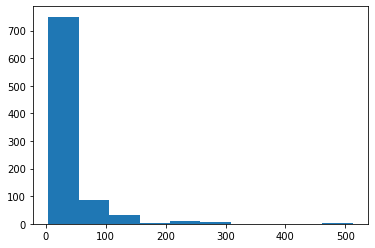

In [155]:
plt.hist(df['Fare']);

In [156]:
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Grouped by survival')

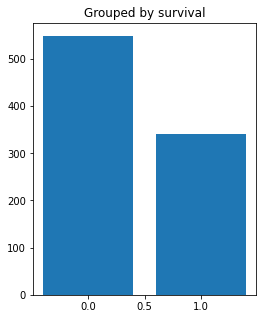

In [157]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')

In [158]:
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

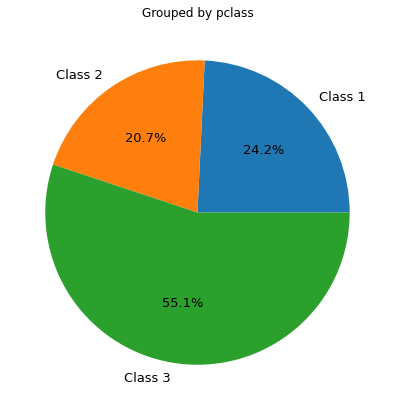

In [159]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [160]:
sex_count = df.groupby('Sex')['Sex'].count()
sex_count

Sex
female    314
male      577
Name: Sex, dtype: int64

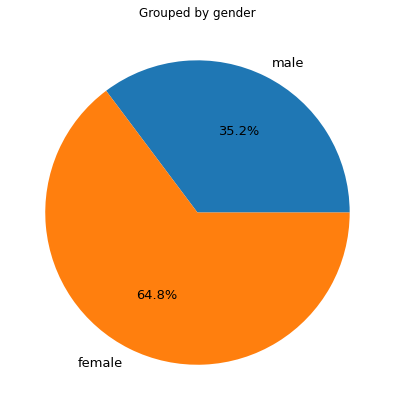

In [161]:
plt.figure(figsize=(7,7))
plt.title('Grouped by gender')
plt.pie(sex_count.values, labels=['male', 'female'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [179]:
emb_count = df.groupby('Embarked')['Embarked'].count()
emb_count

Embarked
28.0      2
C       168
Q        77
S       644
Name: Embarked, dtype: int64

In [177]:
df['Embarked'].unique()

array(['S', 'C', 'Q', 28.0], dtype=object)

In [178]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [167]:
count_male=df[df['Sex']=='female']['Survived'].count()

In [168]:
count_fem=df[df['Sex']=='male']['Survived'].count()

<AxesSubplot:xlabel='Survived', ylabel='count'>

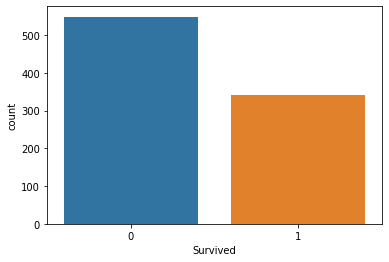

In [169]:
sns.countplot(x=df['Survived'])


In [181]:
label_encoding = {"Sex": {'female':1,'male':0}, 
                 "Embarked":{'S':1,'C':2,'Q':3,'Nan':'missing'}
                 }
df = df.replace(label_encoding)

In [182]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1.0
887,1,1,1,19.0,0,0,30.0000,1.0
888,0,3,1,28.0,1,2,23.4500,1.0
889,1,1,0,26.0,0,0,30.0000,2.0


In [183]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [184]:
from sklearn.model_selection import train_test_split


In [185]:
X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.25, random_state=0)

In [186]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [187]:
from sklearn.model_selection import cross_val_score


In [188]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_val)

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       139
           1       0.75      0.65      0.70        84

    accuracy                           0.79       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223



In [191]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()  
  
model.fit(X_train,y_train)
  
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       139
           1       0.82      0.74      0.78        84

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



In [194]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

model = AdaBoostClassifier(n_estimators=100, random_state=43)
model.fit(X_train,y_train)

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       139
           1       0.74      0.75      0.75        84

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [195]:
test=pd.read_csv('/content/sample_data/testti.csv')
test_df=test.copy()

In [196]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [197]:
test_df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1, inplace=True)


In [198]:
test_df.fillna(df['Age'].median(), inplace = True)

In [199]:
Fare_col = test_df['Fare']
Fare_col.replace(to_replace = 0, value = Fare_col.mean(), inplace=True)

In [200]:
label_encoding = {"Sex": {'female':1,'male':0}, 
                 "Embarked":{'S':1,'C':2,'Q':3,'Nan':'missing'}
                 }
test_df = test_df.replace(label_encoding)

In [201]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,28.0,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,2
415,3,0,38.5,0,0,7.2500,1
416,3,0,28.0,0,0,8.0500,1


In [202]:
x=test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [204]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()  
  
model.fit(X_train,y_train)
  
y_pred = model.predict(x)


In [205]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,